In [ ]:
# first, a test_run of DT on the Iris dataset is conducted

In [44]:
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

print(X_train.shape)

(90, 4)


In [45]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
print(clf)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [46]:
print([clf.score(X_train, y_train), clf.score(X_test, y_test)])

[1.0, 0.9833333333333333]


In [ ]:
# in the next part, we will create a DT that uses the whole data instead of splitted test data and visualize it with graphviz

In [47]:
clf = clf.fit(X, y)

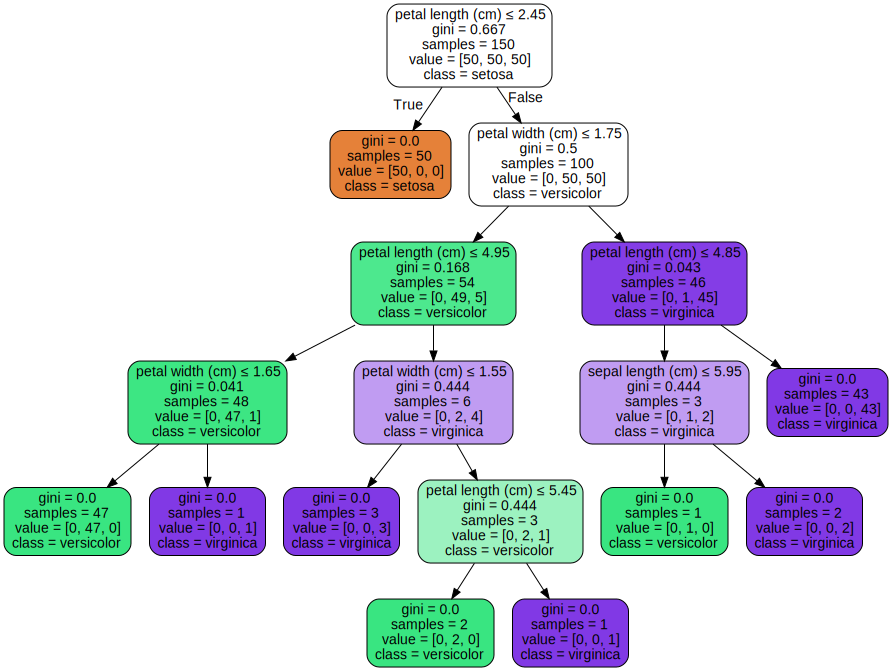

In [81]:
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
# in the following part, we will calculate the distance that takes 
# the common nodes two samples went through before they were splitted
# as a metrics

In [62]:
path = clf.decision_path(X).todense()
n_nodes = clf.tree_.node_count
n_samples = X.shape[0]
print(path.shape)

(150, 17)


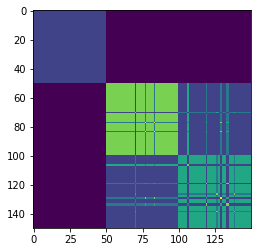

In [89]:
import matplotlib.pyplot as plt

m1 = np.zeros((n_samples, n_samples))
for i in range(n_samples):
    for j in range(n_samples):
        sample_ids = [i, j]
        m1[i, j] = (path[sample_ids].sum(axis=0) == len(sample_ids)).sum()
        
plt.imshow(m1)
plt.show()

In [ ]:
# in the following part, we will calculate the distance that takes 
# the length of the shortest path between the nodes two samples
# landed 

In [86]:
l_children = clf.tree_.children_left
r_children = clf.tree_.children_right

[ 1 -1  3  4  5 -1 -1  8 -1 10 -1 -1 13 14 -1 -1 -1]
[ 2 -1 12  7  6 -1 -1  9 -1 11 -1 -1 16 15 -1 -1 -1]


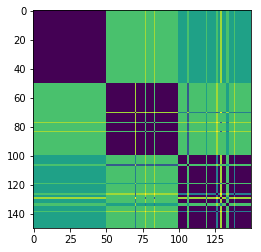

In [91]:
node_depth = np.zeros(n_nodes)
is_leaves = np.zeros(n_nodes)
stack = [(0, -1)]
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    if (l_children[node_id] != r_children[node_id]):
        stack.append((l_children[node_id], parent_depth + 1))
        stack.append((r_children[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = 1

m2 = np.zeros((n_samples, n_samples))
for i in range(n_samples):
    for j in range(n_samples):
        sample_ids = [i, j]
        splitting_depth = (path[sample_ids].sum(axis=0) == len(sample_ids)).sum()
        leaf_i = clf.apply(X[i].reshape(1, -1))
        leaf_j = clf.apply(X[j].reshape(1, -1))
        m2[i, j] = node_depth[leaf_i]+node_depth[leaf_j]-2*splitting_depth  
        
plt.imshow(m2)
plt.show()